# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [18]:
# Details Student 1:Bar Azulay ID:207128695

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

In [4]:
# word net installation:

# unmark if you want to use and need to install
 #!pip install wn
 #!python -m wn download omw-he:1.4

In [5]:
# word net import:

# unmark if you want to use:
 #import wn

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [6]:
# Hebrew tokenizer installation:

# unmark if you want to use and need to install:
 #!pip install hebrew_tokenizer

In [7]:
# Hebrew tokenizer import:

# unmark if you want to use:


### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [8]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [9]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [10]:
df_test.head(8)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...
5,5,בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...
6,6,בשנת 2018 קיבלתי החלטה שאני מתחיל ללמוד לתואר ...
7,7,"בנובמבר האחרון הייתי עם חברים בטיול ים אל ים, ..."


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [11]:

df_names=df_train
df_names2=df_test
df_names.gender.replace({'f':0,'m':1},inplace=True)

Xfeatures=df_names.story

cv1=CountVectorizer()
X=cv1.fit_transform(Xfeatures)
#X
y=df_names.gender
sample_storys=df_names.story
vect=cv1.transform(sample_storys).toarray()



In [12]:
#cv1.get_feature_names()

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

max=0
for b in range(3,26):
    
    clk_l=KNeighborsClassifier(n_neighbors=b)
    scores1 = cross_val_score(clk_l,X,y,cv=10)
    if scores1.mean()>max:
        max=scores1.mean()
        max
        b
max        

0.7038245614035088

3

0.7278070175438597

5

0.7384385964912281

7

0.7530701754385966

9

0.7610000000000001

11

0.762280701754386

18

0.7636140350877193

22

0.7636140350877193

In [13]:
knn_params ={'n_neighbors':[3,5,7,9],'metric':['euclidean','manhattan']} 
clk_c=KNeighborsClassifier()

clk2=GridSearchCV(clk_c,knn_params,cv=10)
clk=KNeighborsClassifier(n_neighbors=3)
clk.fit(X,y)
scores1 = cross_val_score(clk,X,y,cv=10)

GridRes=clk2.fit(X,y)
print('KNeighborsClassifier and GridSearch:')
'best params: ' 
GridRes.best_params_
print('Cross validation Score: ',GridRes.best_score_)


#print()
yk_pred=clk.predict(vect)
ykg_pred=clk2.predict(vect)
print('macro avg f1 score with KNeighborsClassifier and GridSearch=',f1_score(y, ykg_pred, average='macro'))
print()

print(metrics.confusion_matrix(y_true=y,y_pred=ykg_pred))

print()
print()

print('KNeighborsClassifier without GridSearch:')
print()

print('Cross validation mean score=',scores1.mean())
print()
print('Accuracy=',metrics.accuracy_score(y_true=y,y_pred=yk_pred))
#print(classification_report(y,yk_pred,digits=4))
print('macro avg f1 score with KNeighborsClassifier=',f1_score(y, yk_pred, average='macro'))
print(metrics.confusion_matrix(y_true=y,y_pred=yk_pred))
print()

clf=MultinomialNB()

scores = cross_val_score(clf,X,y,cv=10)

clf.fit(X,y)
print('Cross validation mean score=',scores.mean())


sample_story=(df_test.iloc[18,1])
#sample_story
sample_story=[sample_story]
sample_storys=df_names.story
#sample_storys
sample_storys2=df_names2.story

y_pred=clf.predict(vect)

vect1=cv1.transform(sample_storys2).toarray()
y1_pred=clf.predict(vect1)

print()
print('Accuracy=',metrics.accuracy_score(y_true=y,y_pred=y_pred))
print('macro avg f1 score with MultinomialNB=',f1_score(y, y_pred, average='macro'))
print(metrics.confusion_matrix(y_true=y,y_pred=y_pred))
'df train gender array:'
y_pred
'df test gender prediction array:'

y1_pred


KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier and GridSearch:


'best params: '

{'metric': 'manhattan', 'n_neighbors': 7}

Cross validation Score:  0.7636140350877192
macro avg f1 score with KNeighborsClassifier and GridSearch= 0.602376956685281

[[ 34 144]
 [  2 573]]


KNeighborsClassifier without GridSearch:

Cross validation mean score= 0.7038245614035088

Accuracy= 0.8432934926958832
macro avg f1 score with KNeighborsClassifier= 0.7480319872958259
[[ 86  92]
 [ 26 549]]



MultinomialNB()

Cross validation mean score= 0.7530175438596491

Accuracy= 0.9933598937583001
macro avg f1 score with MultinomialNB= 0.9907495903038999
[[174   4]
 [  1 574]]


'df train gender array:'

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,

'df test gender prediction array:'

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

(array([178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 575.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

(array([  5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 318.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

,test_example_id,Prediction
0,0,male
1,1,male
2,2,male
3,3,male
4,4,male


,test_example_id,Prediction
318,318,male
319,319,male
320,320,male
321,321,male
322,322,male


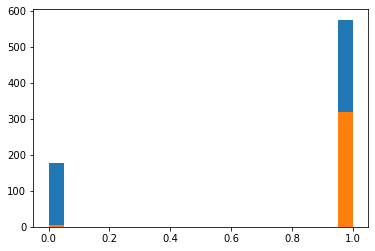

In [17]:
df_res=df_test.copy()
df_res['Prediction']=y1_pred.tolist()
df_predicted=df_res[['test_example_id','Prediction']]
df_predicted.Prediction.replace({0:'female',1:'male'},inplace=True)
plt.hist(df_train["gender"],bins=20)
plt.hist(df_res["Prediction"],bins=20)
df_predicted.head(5)
df_predicted.tail(5)



In [15]:
df_predicted.iloc[60:120,:]
df_res.iloc[64,1]

,test_example_id,Prediction
60,60,male
61,61,male
62,62,male
63,63,male
64,64,female
65,65,male
66,66,male
67,67,male
68,68,male
69,69,male


'פעם נסעתי במסגרת עבודתי כשליחה ברחוב רוטשילד בראשון לציון מכיוון מזרח למערב. כשהגעתי לצומת של רחוב בן גוריון מצד ימין ושפרינצק מצד שמאל פניתי ימינה לרחוב בן גוריון. לאחר כמאה מטרים הגעתי לכיכר השוטר. בכיכר פניתי ימינה לכיוון רחוב ברל כצנלסון. לצערי גיליתי שהתבלבלתי בדרך ולכן פניתי ימינה לרחוב התקווה ובהגיעי לצומת טי פניתי ימינה לרחוב רוטשילד. לפתע קפץ הולך רגל לכביש עם חתול בידו, מיד בלמתי בלימת חירום. הולך הרגל נבהל ופרש את ידיו לאוויר וצעק " "אוי גוועלד" ". כתוצאה מכך החתול הכתום ושמו גרפילד שעד אותה עת היה בידיו, נפל על הראש שלו ומכאן למדתי שחתול לא תמיד נוחת על הרגליים. פניתי לאיש ושאלתי לשלומו. הוא ענה לי שהוא מרגיש בסדר ורק נבהל. האיש הרים את החתול בידיו והמשיך לדרכו בעודו ממלמל לכיוון החתול " "זהו גרפילד, הולכים הביתה…" ". המשכתי מערבה על רחוב רוטשילד כל הדרך עד צומת בן גוריון שבו המשכתי לכיוון שער ראשון. בשער ראשון גם החלטתי להמשיך ישר כל הדרך עד קרית גנים השכונה הטובה בעולם. כשהגעתי לכתובת המיוחלת, מסרתי את המשלוח למזמין. המזמין קיבל את המשלוח בשמחה רבה ובטוב לבב. קיבלתי תשר 

### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [16]:
df_predicted.to_csv('classification_results.csv',index=False)